In [1]:
#!pip install pycocotools
#!pip install -U openmim
#!mim install mmcv-fulddl
#!mim install mmdet

In [2]:
# reference : https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/visualization/image.py
from core.visualization.image import imshow_det_bboxes

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
train/0200.jpg
[0, 426, 246, 606]
[375, 0, 1023, 447]
[382, 53, 939, 399]
[285, 36, 396, 136]
[912, 271, 1023, 365]
[128, 135, 1023, 1023]
[360, 293, 818, 722]
[137, 365, 383, 469]
[537, 420, 779, 722]


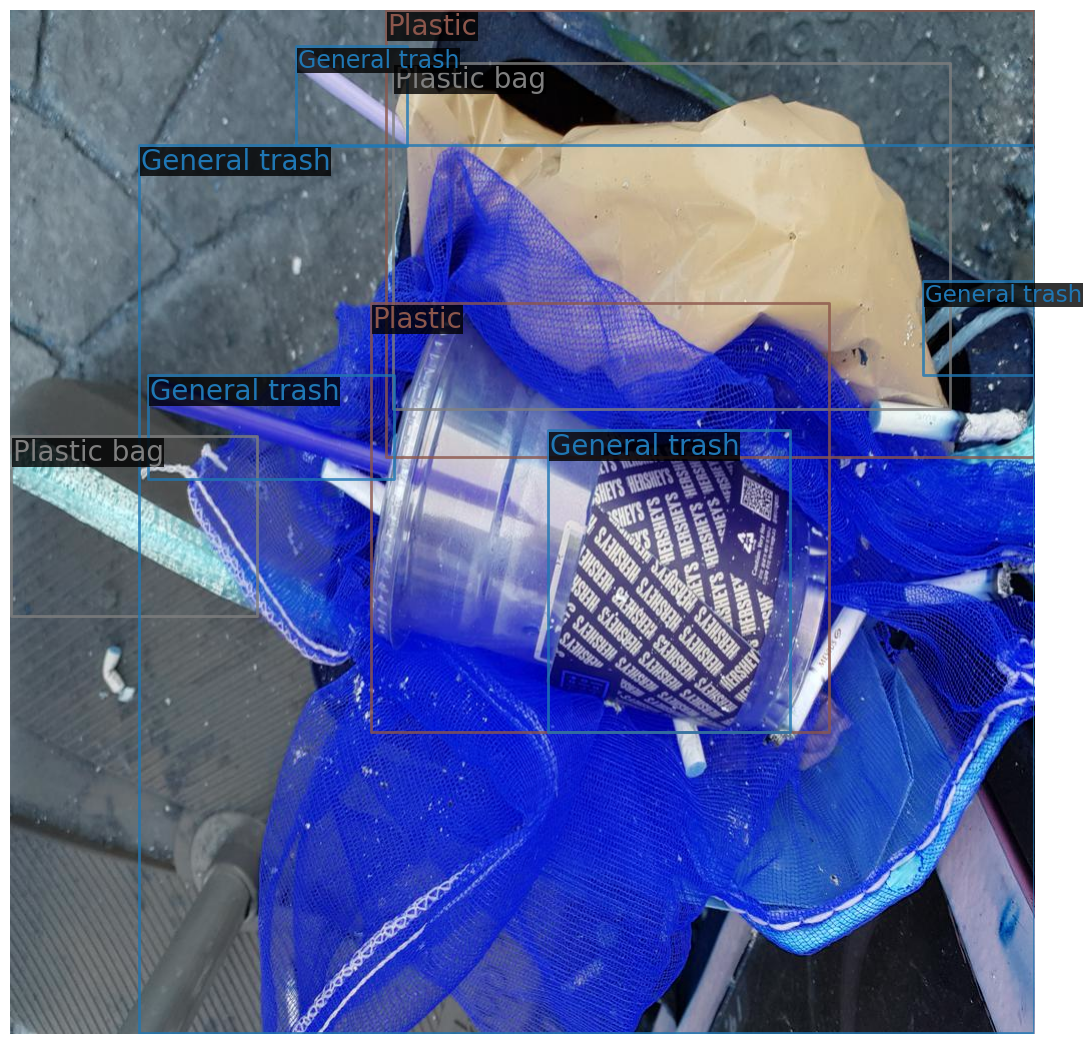

array([[[128, 118,  93],
        [132, 122,  97],
        [135, 125, 100],
        ...,
        [ 82,  89, 128],
        [ 83,  90, 130],
        [ 83,  91, 130]],

       [[128, 118,  93],
        [132, 122,  97],
        [136, 126, 101],
        ...,
        [ 85,  91, 124],
        [ 87,  92, 126],
        [ 84,  91, 130]],

       [[130, 120,  95],
        [134, 124,  99],
        [138, 128, 103],
        ...,
        [115, 108,  90],
        [120, 113,  95],
        [ 88,  94, 127]],

       ...,

       [[128, 116, 100],
        [102,  90,  74],
        [103,  91,  75],
        ...,
        [184, 153, 148],
        [184, 154, 149],
        [181, 129,  65]],

       [[135, 124, 106],
        [110,  99,  81],
        [110,  99,  81],
        ...,
        [180, 129,  64],
        [181, 129,  65],
        [181, 126,  56]],

       [[116, 105,  87],
        [ 96,  85,  67],
        [ 98,  87,  69],
        ...,
        [180, 126,  54],
        [180, 126,  54],
        [181, 126,  55]]

In [9]:
import os
from PIL import Image
from pycocotools.coco import COCO
import pandas as pd; pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns

# image
img_dir = '/opt/ml/dataset/train'
img_file_name = '0200.jpg'
img_filepath_name = 'train/'
img_filepath_name += img_file_name
img_path = os.path.join(img_dir, img_file_name)  
img = Image.open(img_path)

# bbox
jsonfile_path = './trimtrain.json'
coco = COCO(jsonfile_path)

train_df = pd.DataFrame()

image_ids = []
class_name = []
class_id = []
x_min = []
y_min = []
x_max = []
y_max = []
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
for image_id in coco.getImgIds():
        
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_info['id'])
    anns = coco.loadAnns(ann_ids)
        
    file_name = image_info['file_name']
        
    for ann in anns:
        image_ids.append(file_name)
        class_name.append(classes[ann['category_id']])
        class_id.append(ann['category_id'])
        x_min.append(float(ann['bbox'][0]))
        y_min.append(float(ann['bbox'][1]))
        x_max.append(float(ann['bbox'][0]) + float(ann['bbox'][2]))
        y_max.append(float(ann['bbox'][1]) + float(ann['bbox'][3]))

train_df['image_id'] = image_ids
train_df['class_name'] = class_name
train_df['class_id'] = class_id
train_df['x_min'] = x_min
train_df['y_min'] = y_min
train_df['x_max'] = x_max
train_df['y_max'] = y_max

print(img_filepath_name)

annotations = (train_df.loc[train_df['image_id'] == img_filepath_name]).values.tolist()

labels = []
bboxes = []
for annotation in annotations:
    labels.append(int(annotation[2]))
    x_min = int(annotation[3])
    y_min = int(annotation[4])
    x_max = int(annotation[5])
    y_max = int(annotation[6])
    bboxes.append([x_min, y_min, x_max, y_max])

if(len(bboxes) == 0):
    quit    
    
color_list = sns.color_palette(n_colors = 10)

rgblist = []

for i, color in enumerate(color_list):
    for t, value in enumerate(color):
        rgblist.append(int(value * 255.0))
     
for i, box in enumerate(bboxes):
    print(box)

rgblist = np.array(rgblist).reshape(10, -10).tolist()

imshow_det_bboxes(img=np.array(img), bboxes=np.array(bboxes), labels=np.array(labels), class_names=classes, bbox_color=rgblist,
        text_color=rgblist,
        mask_color=rgblist, thickness = 2, font_size = 20)


In [ ]:
len(bboxes)